In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
with open("/home/ssawicki/porsche_digital_hpi/object_detection_yolo/frames_detected/depth_map.npy", "rb") as fp:
    depth_map = np.load(fp)

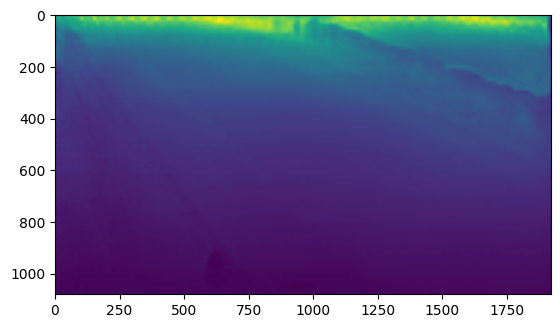

In [12]:
plt.imshow(depth_map)

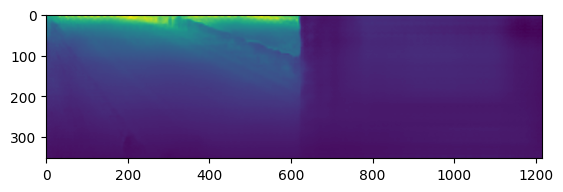

In [9]:
with open("/home/ssawicki/porsche_digital_hpi/object_detection_yolo/frames_detected/depth_map_predictions_uncut.npy", "rb") as fp:
    depth_map = np.load(fp)
plt.imshow(depth_map)

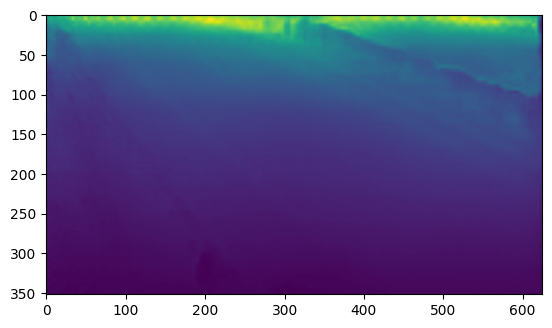

In [10]:
with open("/home/ssawicki/porsche_digital_hpi/object_detection_yolo/frames_detected/depth_map_predictions.npy", "rb") as fp:
    depth_map = np.load(fp)
plt.imshow(depth_map)